## Enrolments in full-time undergraduate Engineering and technology courses at Scottish Universities

Investigating trends for female enrolment in full-time Undergraduate Engineering and technology courses at Scottish Universities against male enrolment.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import janitor
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# Customisations for plotting
male_color = "mediumaquamarine"
female_color = "darkviolet"
other_color = "orange"

ticks_size = 12

<hr style="border:5px solid #7A7A7A"> </hr>  

## Data sources and import
Data was obtained from <a href="https://www.hesa.ac.uk/" target="_blank">HESA</a> (the Higher Education Statistical Agency). A copy of the csv files used in the notebook are available in the <a href="https://github.com/kjp07/Women-In-STEM/tree/main/data" target="_blank">Women in STEM repository</a> on GitHub. 

There are two datasets used in this report. One has data ranging from 2014/15 to 2018/19 academic years; the other is for the 2019/20 academic year. This is because a new subject coding system was implemented in 2019/20.

<strong>Important note:</strong> A new subject coding system - the Higher Education Classification of Subjects (HECoS) - was been implemented from 2019/20. This replaced the old system - the Joint Academic Coding System (JACS). This means some subjects may have been incorporated to the "Computing" subject area from 2019/2020.

<hr style="border:2px solid #7A7A7A" width="50%" align="left"> </hr>  

## 1. 2014-2019 dataset  
### 1.1 Import data

In [3]:
# Read in 2014-2019 dataset
df1 = pd.read_csv(r"https://github.com/kjp07/Women-In-STEM/blob/main/data/2014-2019.csv?raw=true", header=17)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134380 entries, 0 to 134379
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Subject Area            134380 non-null  object
 1   First year marker       134380 non-null  object
 2   Level of study          134380 non-null  object
 3   Mode of study           134380 non-null  object
 4   Country of HE provider  134380 non-null  object
 5   Sex                     134380 non-null  object
 6   Academic Year           134380 non-null  object
 7   Number                  134380 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.2+ MB


### 1.2 View unique values in each column

This will allow us to filter for specific columns later.

In [4]:
print(df1["Subject Area"].unique())
print(df1["First year marker"].unique())
print(df1["Level of study"].unique())
print(df1["Mode of study"].unique())
print(df1["Country of HE provider"].unique())

['(1) Medicine & dentistry' '(2) Subjects allied to medicine'
 '(3) Biological sciences' '(4) Veterinary science'
 '(5) Agriculture & related subjects' '(6) Physical sciences'
 '(7) Mathematical sciences' '(8) Computer science'
 '(9) Engineering & technology' '(A) Architecture, building & planning'
 'Total - Science subject areas' '(B) Social studies' '(C) Law'
 '(D) Business & administrative studies'
 '(E) Mass communications & documentation' '(F) Languages'
 '(G) Historical & philosophical studies' '(H) Creative arts & design'
 '(I) Education' '(J) Combined' 'Total - Non-science subject areas'
 'Total']
['All' 'First year' 'Other years']
['All' 'Postgraduate (research)' 'Postgraduate (taught)'
 'All postgraduate' 'First degree' 'Other undergraduate'
 'All undergraduate']
['Full-time' 'Part-time' 'All']
['England' 'Northern Ireland' 'Scotland' 'Wales' 'All']


### 1.3 Cleaning and Prep

In [5]:
# Headers to snakecase
df1_clean = df1.clean_names()

In [6]:
# Drop total rows (Total - Science subject areas, Total - Non-science subject areas, Total)
df1_clean = df1_clean[(df1_clean["subject_area"] != "Total") 
                                & (df1_clean["subject_area"] != "Total - Science subject areas")
                                & (df1_clean["subject_area"] != "Total - Non-science subject areas")
                                & (df1_clean["subject_area"] != "(J) Combined")].copy()

In [7]:
# Remove the brackets and number/letter at the start of the Subject Area values
df1_clean["subject_area"] = df1_clean["subject_area"].str[4:]
print(df1_clean["subject_area"].unique())

['Medicine & dentistry' 'Subjects allied to medicine'
 'Biological sciences' 'Veterinary science'
 'Agriculture & related subjects' 'Physical sciences'
 'Mathematical sciences' 'Computer science' 'Engineering & technology'
 'Architecture, building & planning' 'Social studies' 'Law'
 'Business & administrative studies' 'Mass communications & documentation'
 'Languages' 'Historical & philosophical studies' 'Creative arts & design'
 'Education']


### 1.4 Filter dataset to points of interest

We are interested in Undergraduate study at Scottish universities. We'll focus on full-time study and first year enrolled.

In [8]:
# Filter for Scotland, Undergraduate level of study, full-time study, first year enrolled
ug_scotland_df = df1_clean[(df1_clean["first_year_marker"] == "First year")
                     & (df1_clean["country_of_he_provider"] == "Scotland")
                     & (df1_clean["level_of_study"] == "All undergraduate")
                     & (df1_clean["mode_of_study"] == "Full-time")].copy()
ug_scotland_df.shape

(360, 8)

We are also interested in Engineering and technology, so we'll filter for this too.

In [9]:
# Dataset per subject area
# Get Computer Science subject area
et_ug_scotland_df = ug_scotland_df[ug_scotland_df["subject_area"] == "Engineering & technology"].copy()
et_ug_scotland_df

,subject_area,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
52780,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Female,2014/15,730
52781,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Male,2014/15,3455
52782,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Other,2014/15,0
52783,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Total,2014/15,4185
52784,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Female,2015/16,755
52785,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Male,2015/16,3450
52786,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Other,2015/16,5
52787,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Total,2015/16,4205
52788,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Female,2016/17,785
52789,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Male,2016/17,3415


<hr style="border:2px solid #7A7A7A" width="50%" align="left"> </hr>  

## 2. 2019/2020 dataset  
### 2.1 Import data

In [10]:
# Import 2019-2020 dataset
df2 = pd.read_csv(r"https://github.com/kjp07/Women-In-STEM/blob/main/data/2019-2020.csv?raw=True", header=14)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32944 entries, 0 to 32943
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CAH level 1             32944 non-null  object
 1   First year marker       32944 non-null  object
 2   Level of study          32944 non-null  object
 3   Mode of study           32944 non-null  object
 4   Country of HE provider  32944 non-null  object
 5   Sex                     32944 non-null  object
 6   Academic Year           32944 non-null  object
 7   Number                  32944 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


In [11]:
df2.head()

,CAH level 1,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370
4,01 Medicine and dentistry,All,All,Full-time,All,Female,2019/20,36470


### 2.2 View unique values in each column

This will allow us to filter for specific columns later.

In [12]:
# View unique values in each column to see what can be filtered
print(df2["CAH level 1"].unique())
print(df2["First year marker"].unique())
print(df2["Level of study"].unique())
print(df2["Mode of study"].unique())
print(df2["Country of HE provider"].unique())

['01 Medicine and dentistry' '02 Subjects allied to medicine'
 '03 Biological and sport sciences' '04 Psychology'
 '05 Veterinary sciences' '06 Agriculture, food and related studies'
 '07 Physical sciences' '08 General and others in sciences'
 '09 Mathematical sciences' '10 Engineering and technology' '11 Computing'
 '12 Geographical and environmental studies (natural sciences)'
 '13 Architecture, building and planning' 'Total science CAH level 1'
 '12 Geographical and environmental studies (social sciences)'
 '14 Humanities and liberal arts (non-specific)' '15 Social sciences'
 '16 Law' '17 Business and management' '18 Communications and media'
 '19 Language and area studies'
 '20 Historical, philosophical and religious studies'
 '21 Creative arts and design' '22 Education and teaching'
 '23 Combined and general studies' 'Total non-science CAH level 1' 'Total']
['All' 'First year' 'Other years']
['All' 'Postgraduate (research)' 'Postgraduate (taught)'
 'All postgraduate' 'First degree

### 2.3 Cleaning and prep

In [13]:
# Headers to snakecase
df2_clean = df2.clean_names()

In [14]:
# Drop total rows (Total - Science subject areas, Total - Non-science subject areas, Total)
df2_clean = df2_clean[(df2_clean["cah_level_1"] != "Total") 
                                & (df2_clean["cah_level_1"] != "Total science CAH level 1")
                                & (df2_clean["cah_level_1"] != "Total non-science CAH level 1")
                                & (df2_clean["cah_level_1"] != "Combined and general studies")].copy()

In [15]:
# Remove the brackets and number/letter at the start of the Subject Area values
df2_clean["cah_level_1"] = df2_clean["cah_level_1"].str[3:]
print(df2_clean["cah_level_1"].unique())

['Medicine and dentistry' 'Subjects allied to medicine'
 'Biological and sport sciences' 'Psychology' 'Veterinary sciences'
 'Agriculture, food and related studies' 'Physical sciences'
 'General and others in sciences' 'Mathematical sciences'
 'Engineering and technology' 'Computing'
 'Geographical and environmental studies (natural sciences)'
 'Architecture, building and planning'
 'Geographical and environmental studies (social sciences)'
 'Humanities and liberal arts (non-specific)' 'Social sciences' 'Law'
 'Business and management' 'Communications and media'
 'Language and area studies'
 'Historical, philosophical and religious studies'
 'Creative arts and design' 'Education and teaching'
 'Combined and general studies']


### 2.4 Filter dataset to points of interest

In [16]:
# Filter for Scotland, Undergraduate level of study, and full-time study
ug_scotland_df2 = df2_clean[(df2_clean["first_year_marker"] == "First year")
                     & (df2_clean["country_of_he_provider"] == "Scotland")
                     & (df2_clean["level_of_study"] == "All undergraduate")
                     & (df2_clean["mode_of_study"] == "Full-time")].copy()
ug_scotland_df2.shape

(96, 8)

In [17]:
# Get Computing subject area
et_ug_scotland_df2 = ug_scotland_df2[ug_scotland_df2["cah_level_1"] == "Engineering and technology"].copy()
et_ug_scotland_df2

,cah_level_1,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
11844,Engineering and technology,First year,All undergraduate,Full-time,Scotland,Female,2019/20,795
11845,Engineering and technology,First year,All undergraduate,Full-time,Scotland,Male,2019/20,3070
11846,Engineering and technology,First year,All undergraduate,Full-time,Scotland,Other,2019/20,5
11847,Engineering and technology,First year,All undergraduate,Full-time,Scotland,Total,2019/20,3870


<hr style="border:2px solid #7A7A7A" width="50%" align="left"> </hr>  

## 3. Append datasets

In [18]:
# Append datasets
# Rename column
et_ug_scotland_df2.rename(columns={"cah_level_1": "subject_area"}, inplace=True)

# Append
et_ug_scotland_df3 = et_ug_scotland_df.append(et_ug_scotland_df2, ignore_index=True)
et_ug_scotland_df3.head(50)

,subject_area,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
0,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Female,2014/15,730
1,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Male,2014/15,3455
2,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Other,2014/15,0
3,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Total,2014/15,4185
4,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Female,2015/16,755
5,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Male,2015/16,3450
6,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Other,2015/16,5
7,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Total,2015/16,4205
8,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Female,2016/17,785
9,Engineering & technology,First year,All undergraduate,Full-time,Scotland,Male,2016/17,3415


We now have a dataset which has the number of full-time undergraduate Engineering and technology enrolments from 2014/15 to 2019/20.

<hr style="border:2px solid #7A7A7A" width="50%" align="left"> </hr>  

## 4. Investigate trends in Engineering and technology UG degrees in Scottish Universities

Reshape the data for easy viewing.

In [19]:
# Full time, UG subjects
ug_pivot = pd.pivot_table(et_ug_scotland_df3, values="number", index="academic_year", columns="sex").reset_index()
ug_pivot.sort_values(by="academic_year", ascending=True, inplace=True)
ug_pivot

sex,academic_year,Female,Male,Other,Total
0,2014/15,730,3455,0,4185
1,2015/16,755,3450,5,4205
2,2016/17,785,3415,0,4205
3,2017/18,725,3330,5,4060
4,2018/19,745,3240,5,3990
5,2019/20,795,3070,5,3870


### 4.1 Percentage changes in each group from 2014/15 to 2019/2020

In [20]:
ug_pivot_1 = ug_pivot.copy()
ug_pivot_1["Female % change"] = ug_pivot_1["Female"].pct_change(periods=5)
ug_pivot_1["Male % change"] = ug_pivot_1["Male"].pct_change(periods=5)
ug_pivot_1["Other % change"] = ug_pivot_1["Other"].pct_change(periods=5)
ug_pivot_1["Total % change"] = ug_pivot_1["Total"].pct_change(periods=5)
ug_pivot_1

sex,academic_year,Female,Male,Other,Total,Female % change,Male % change,Other % change,Total % change
0,2014/15,730,3455,0,4185,NaN,NaN,NaN,NaN
1,2015/16,755,3450,5,4205,NaN,NaN,NaN,NaN
2,2016/17,785,3415,0,4205,NaN,NaN,NaN,NaN
3,2017/18,725,3330,5,4060,NaN,NaN,NaN,NaN
4,2018/19,745,3240,5,3990,NaN,NaN,NaN,NaN
5,2019/20,795,3070,5,3870,0.089041,-0.111433,inf,-0.075269


In [21]:
ug_pivot_1 = ug_pivot.copy()
ug_pivot_1["Female % change"] = ug_pivot_1["Female"].pct_change(periods=4)
ug_pivot_1["Male % change"] = ug_pivot_1["Male"].pct_change(periods=4)
ug_pivot_1["Other % change"] = ug_pivot_1["Other"].pct_change(periods=4)
ug_pivot_1["Total % change"] = ug_pivot_1["Total"].pct_change(periods=4)
ug_pivot_1

sex,academic_year,Female,Male,Other,Total,Female % change,Male % change,Other % change,Total % change
0,2014/15,730,3455,0,4185,NaN,NaN,NaN,NaN
1,2015/16,755,3450,5,4205,NaN,NaN,NaN,NaN
2,2016/17,785,3415,0,4205,NaN,NaN,NaN,NaN
3,2017/18,725,3330,5,4060,NaN,NaN,NaN,NaN
4,2018/19,745,3240,5,3990,0.020548,-0.062229,inf,-0.046595
5,2019/20,795,3070,5,3870,0.052980,-0.110145,0.0,-0.079667


### 4.2 Rate of change between 2014/15 and 2018/19

In [22]:
# Female rate of change in enrolments 2014/15 to 2018/19
female_2014_15 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2014/15", "Female"].iloc[0]
female_2018_19 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2018/19", "Female"].iloc[0]
female_2019_20 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2019/20", "Female"].iloc[0]

# 2014/15 to 2018/19
female_rate_of_change_14_19 = ((female_2018_19 - female_2014_15) / 5).astype("int")
print("Female enrolment rate of change (2014-2019):", female_rate_of_change_14_19)

# 2014/15 to 2019/20
female_rate_of_change_14_20 = ((female_2019_20 - female_2014_15) / 5).astype("int")
print("Female enrolment rate of change (2014-2020):", female_rate_of_change_14_20)

Female enrolment rate of change (2014-2019): 3
Female enrolment rate of change (2014-2020): 13


In [23]:
# Male rate of change in enrolments 2014/15 to 2018/19
male_2014_15 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2014/15", "Male"].iloc[0]
male_2018_19 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2018/19", "Male"].iloc[0]
male_2019_20 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2019/20", "Male"].iloc[0]

# 2014/15 to 2018/19
male_rate_of_change_14_19 = ((male_2018_19 - male_2014_15) / 5).astype("int")
print("Male enrolment rate of change (2014-2019):", male_rate_of_change_14_19)

# 2014/15 to 2019/20
male_rate_of_change_14_20 = ((male_2019_20 - male_2014_15) / 5).astype("int")
print("Male enrolment rate of change (2014-2020):", male_rate_of_change_14_20)

Male enrolment rate of change (2014-2019): -43
Male enrolment rate of change (2014-2020): -77


In [24]:
# Total rate of change in enrolments 2014/15 to 2018/19
total_2014_15 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2014/15", "Total"].iloc[0]
total_2018_19 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2018/19", "Total"].iloc[0]
total_2019_20 = ug_pivot_1.loc[ug_pivot_1['academic_year'] == "2019/20", "Total"].iloc[0]

# 2014/15 to 2018/19
total_rate_of_change_14_19 = ((total_2018_19 - total_2014_15)/5).astype("int")
print("Total enrolment rate of change (2014-2019):", total_rate_of_change_14_19)

# 2014/15 to 2019/20
total_rate_of_change_14_20 = ((total_2019_20 - total_2014_15)/5).astype("int")
print("Total enrolment rate of change (2014-2020):", total_rate_of_change_14_20)

Total enrolment rate of change (2014-2019): -39
Total enrolment rate of change (2014-2020): -63


### 4.3 Proportions of each group per academic year


In [25]:
# Proportion of each group
ug_pivot_2 = ug_pivot.copy()
ug_pivot_2["% of females"] = round((ug_pivot_2["Female"] / ug_pivot_2["Total"]) * 100, 2)
ug_pivot_2["% of males"] = round((ug_pivot_2["Male"] / ug_pivot_2["Total"]) * 100, 2)
ug_pivot_2["% of other"] = round((ug_pivot_2["Other"] / ug_pivot_2["Total"]) * 100, 2)
ug_pivot_2

sex,academic_year,Female,Male,Other,Total,% of females,% of males,% of other
0,2014/15,730,3455,0,4185,17.44,82.56,0.00
1,2015/16,755,3450,5,4205,17.95,82.05,0.12
2,2016/17,785,3415,0,4205,18.67,81.21,0.00
3,2017/18,725,3330,5,4060,17.86,82.02,0.12
4,2018/19,745,3240,5,3990,18.67,81.20,0.13
5,2019/20,795,3070,5,3870,20.54,79.33,0.13


From 2014/15 to 2018/19, the proportion of females enrolling in engineering and technology subjects increased (17.44% to 18.67% of total enrolments), with a slight dip in 2017/18.

The proportion of females enrolling in engineering and technology subjects appears to increased to 20.54% in 2019/20. However, it is uncertain how much of this is due to subjects now coming under "Engineering and technology" with the implementation of the HECoS subject coding system.

### 4.4 Plots

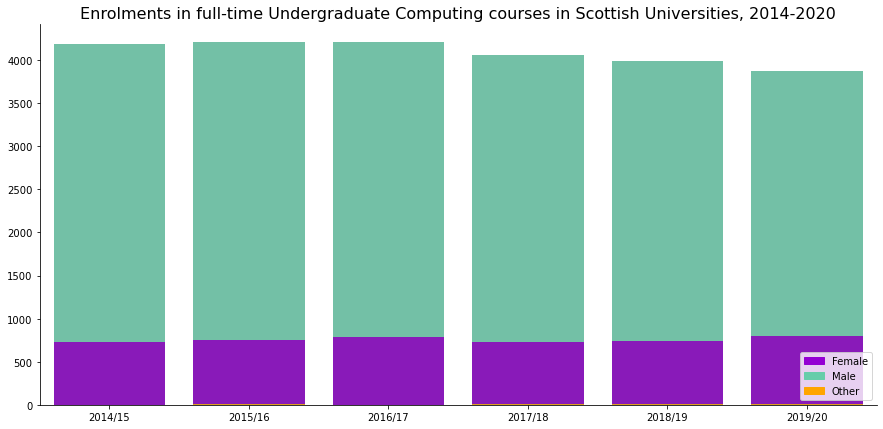

In [26]:
# Sort by academic year
sort_ix = ["2014/15", "2015/16", "2016/17", "2017/18", "2018/19", "2019/20"]

# Plot actual numbers of enrolment
plt.figure(figsize=(15,7))
t = sns.barplot(x="academic_year", y="Total", order=sort_ix, palette=[male_color], data=ug_pivot)
f = sns.barplot(x="academic_year", y="Female", order=sort_ix, palette=[female_color], data=ug_pivot)
o = sns.barplot(x="academic_year", y="Other", order=sort_ix, palette=[other_color], data=ug_pivot)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
other_bar = mpatches.Patch(color=other_color, label='Other')
plt.legend(handles=[female_bar, male_bar, other_bar], loc='lower right')

plt.title("Enrolments in full-time Undergraduate Computing courses in Scottish Universities, 2014-2020", size=16)
plt.ylabel("")
plt.xlabel("")
sns.despine()
plt.show()

In [27]:
# Filter out "Total"
et_ug_scotland_f_m = et_ug_scotland_df3[(et_ug_scotland_df3["sex"] != "Total")].copy()

# Calculate percentages of female enrolment per subject
total = et_ug_scotland_df3[et_ug_scotland_df3["sex"] == "Total"].copy()
female = et_ug_scotland_df3[et_ug_scotland_df3["sex"] =='Female'].copy()
other = et_ug_scotland_df3[et_ug_scotland_df3["sex"] =='Other'].copy()
total['%'] = [i / j * 100 for i,j in zip(total['number'], total['number'])]
female['%'] = [i / j * 100 for i,j in zip(female['number'], total['number'])]
other['%'] = [i / j * 100 for i,j in zip(other['number'], total['number'])]

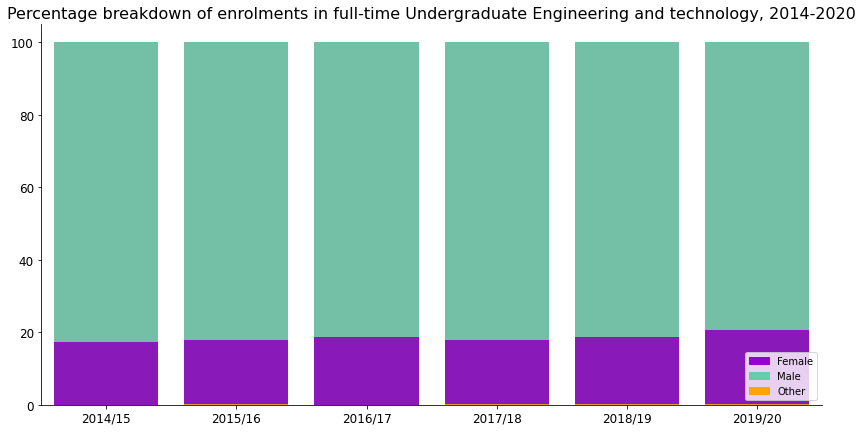

In [28]:
# set the figure size
plt.figure(figsize=(14, 7))

# bar chart 1 -> top bars (Males)
bar1 = sns.barplot(x="academic_year",  y="%", data=total, color=male_color)

# bar chart 2 -> middle bars (Females)
bar2 = sns.barplot(x="academic_year", y="%", data=female, color=female_color)

# bar chart 3 -> bottom bars (Other)
bar3 = sns.barplot(x="academic_year", y="%", data=other, color=other_color)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
other_bar = mpatches.Patch(color=other_color, label='Other')
plt.legend(handles=[female_bar, male_bar, other_bar], loc='lower right')

# show the graph
plt.title("Percentage breakdown of enrolments in full-time Undergraduate Engineering and technology, 2014-2020", size=16)
plt.xlabel("")
plt.xticks(size=ticks_size)
plt.ylabel("")
plt.yticks(size=ticks_size)
sns.despine()
plt.show()

<hr style="border:2px solid #7A7A7A" width="50%" align="left"> </hr>  

## 5. Main takeaways
- Enrolments in Engineering and technology subjects have decreased from 4185 to 3870 between 2014/15 and 2019/20, a 7.5% decrease. Engineering and technology has the 4th largest full-time undergraduate student population in Scottish Universities.
- The proportion of females enrolling in Engineering and technology courses appears to have increased from 17.% in 2014/15 to 20.54% in 2019/20.
- Female enrolment in Engineering and technology increased by approximately 13 students per academic year between 2014/15 and 2019/20. 
- Male enrolment in Engineering and technology decreased by approximately 63 students per per academic year between 2014/15 and 2019/20.

<hr style="border:2px solid #7A7A7A" width="50%" align="left"> </hr>  

## 6. Issues with the above work

A new subject coding system - the Higher Education Classification of Subjects (HECoS) - was been implemented from 2019/20. This replaced the old system - the Joint Academic Coding System (JACS).

Also the above datasets are for enrollments to Scottish Universities regardless of the students domicile, i.e., where they consider home. This means students from other parts of the UK and abroad are included in this analysis.